# Classificação de Falhas Elétricas

## Importando as Bibliotecas Necessárias

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier  # Importar o RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import matplotlib.pyplot as plt

## Lendo o arquivo Excel

In [11]:
data = pd.read_excel("teste_01.xlsx")

## Vizualizar a Base Importada e o Tamanho da Base

In [4]:
display(data)

,fault_location,rms_phase_A_current,rms_phase_B_current,rms_phase_C_current,rms_phase_A_voltage,rms_phase_B_voltage,rms_phase_C_voltage,energy_phase_A_current,energy_phase_B_current,energy_phase_C_current,fault_type
0,"385,02",51.19,5.65,5.39,2.22,22.68,2.26,2.498346,25.048817,2.052261,ABC
1,"256,68",51.18,4.79,22.44,2.62,2.43,30.99,2.304220,23.111179,2.051236,ABG
2,"207,0",51.18,23.82,47.11,2.52,3.14,25.77,1.618616,16.278847,2.039654,ACG
3,"235,98",51.17,2.99,2.38,29.76,24.63,30.66,15.663845,15.758598,20.370444,AB
4,"244,26",51.17,48.47,5.04,2.62,25.56,25.71,15.165984,15.262261,20.363677,ABC
...,...,...,...,...,...,...,...,...,...,...,...
81688,"28,98",0.00,7.50,7.22,2.08,21.27,21.17,7.148889,7.900303,9.039971,ABC
81689,"331,2",0.00,4.60,4.81,25.46,24.87,24.95,7.601072,26.540207,5.626079,ABC
81690,"310,5",0.00,4.29,4.10,2.62,26.76,2.66,0.680862,7.719510,8.848617,ABC
81691,"351,9",0.00,2.06,3.31,2.70,30.40,28.42,6.472102,7.565461,0.866557,ACG


## Checando Valores Nulos e Tipos de Dados

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81693 entries, 0 to 81692
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fault_location          81693 non-null  object 
 1   rms_phase_A_current     81693 non-null  float64
 2   rms_phase_B_current     81693 non-null  float64
 3   rms_phase_C_current     81693 non-null  float64
 4   rms_phase_A_voltage     81693 non-null  float64
 5   rms_phase_B_voltage     81693 non-null  float64
 6   rms_phase_C_voltage     81693 non-null  float64
 7   energy_phase_A_current  81693 non-null  float64
 8   energy_phase_B_current  81693 non-null  float64
 9   energy_phase_C_current  81693 non-null  float64
 10  fault_type              81693 non-null  object 
dtypes: float64(9), object(2)
memory usage: 6.9+ MB


## Formatando a coluna "fault_location" para o Dtype float64

In [12]:
# Substituir vírgulas por pontos
data['fault_location'] = data['fault_location'].str.replace(',', '.')

# Converter para float
data['fault_location'] = data['fault_location'].astype(float)

# Vizualizando Novamente a Base
display(data)

,fault_location,rms_phase_A_current,rms_phase_B_current,rms_phase_C_current,rms_phase_A_voltage,rms_phase_B_voltage,rms_phase_C_voltage,energy_phase_A_current,energy_phase_B_current,energy_phase_C_current,fault_type
0,385.02,51.19,5.65,5.39,2.22,22.68,2.26,2.498346,25.048817,2.052261,ABC
1,256.68,51.18,4.79,22.44,2.62,2.43,30.99,2.304220,23.111179,2.051236,ABG
2,207.00,51.18,23.82,47.11,2.52,3.14,25.77,1.618616,16.278847,2.039654,ACG
3,235.98,51.17,2.99,2.38,29.76,24.63,30.66,15.663845,15.758598,20.370444,AB
4,244.26,51.17,48.47,5.04,2.62,25.56,25.71,15.165984,15.262261,20.363677,ABC
...,...,...,...,...,...,...,...,...,...,...,...
81688,28.98,0.00,7.50,7.22,2.08,21.27,21.17,7.148889,7.900303,9.039971,ABC
81689,331.20,0.00,4.60,4.81,25.46,24.87,24.95,7.601072,26.540207,5.626079,ABC
81690,310.50,0.00,4.29,4.10,2.62,26.76,2.66,0.680862,7.719510,8.848617,ABC
81691,351.90,0.00,2.06,3.31,2.70,30.40,28.42,6.472102,7.565461,0.866557,ACG


## Analisando algumas informações estatísticas

In [13]:
data.describe()

,fault_location,rms_phase_A_current,rms_phase_B_current,rms_phase_C_current,rms_phase_A_voltage,rms_phase_B_voltage,rms_phase_C_voltage,energy_phase_A_current,energy_phase_B_current,energy_phase_C_current
count,81693.000000,81693.000000,81693.000000,81693.000000,81693.000000,81693.000000,81693.000000,81693.000000,81693.000000,81693.000000
mean,188.223320,8.837541,10.531961,10.454606,12.300286,12.531297,12.543933,10.638699,10.612354,10.689280
std,130.367707,8.746409,9.731691,9.688789,10.286884,11.310979,11.902420,10.925005,10.124625,10.109672
min,4.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000168,0.000161,0.000196
25%,62.100000,4.240000,2.460000,2.470000,2.360000,2.560000,2.800000,3.080731,2.150356,2.144329
50%,190.440000,6.910000,7.080000,7.110000,12.400000,3.270000,3.160000,6.961358,7.277248,7.522039
75%,302.220000,10.030000,17.430000,16.690000,22.280000,23.010000,24.880000,14.481537,17.659956,17.765615
max,414.000000,51.190000,63.220000,62.110000,65.320000,65.430000,65.060000,81.323302,82.367801,83.272032


## Classificação Sem Ruído Branco

Acurácia do modelo RandomForestClassifier: 99.77%

Acurácia média do modelo RandomForestClassifier com validação cruzada: 99.65%

Matriz de Confusão:

[[3343    0    2    0    0]
 [   1 3354    8    0    4]
 [   4    6 3358    1    0]
 [   0    0    1 3321    0]
 [   0    7    0    4 2925]]

Precisão por classe:
Classe 0: 99.85%
Classe 1: 99.61%
Classe 2: 99.67%
Classe 3: 99.85%
Classe 4: 99.86%

Precisão média do modelo RandomForestClassifier nos dados de teste: 99.77%

Recall médio do modelo RandomForestClassifier nos dados de teste: 99.77%



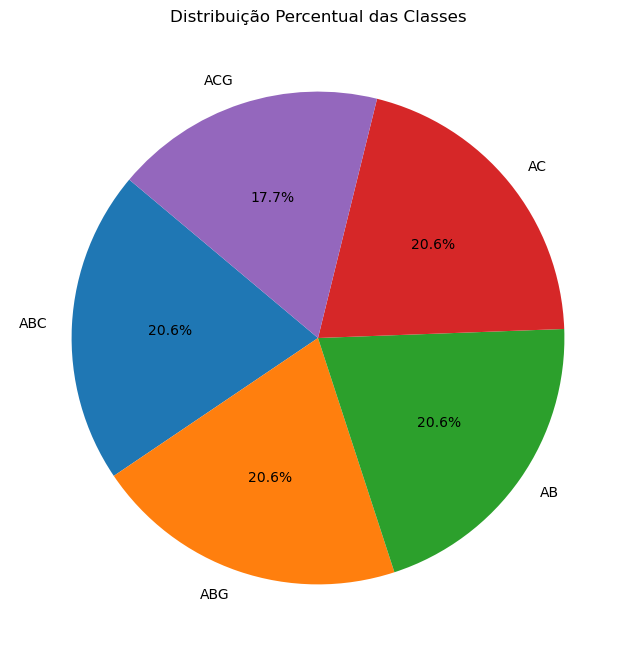

In [22]:
# Divisão dos dados em recursos (X) e rótulos (y)
X = data.drop(['fault_type'], axis=1)  # Selecionar os recursos (todas as colunas, exceto a coluna de rótulo)
y = data['fault_type']  # Selecionar a coluna de rótulo

# Divisão dos dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar um modelo RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de árvores = 100
random_forest.fit(X_train, y_train)


# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

# Calcular e exibir métricas de avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo RandomForestClassifier: {accuracy * 100:.2f}%\n')

cv_accuracy = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f'Acurácia média do modelo RandomForestClassifier com validação cruzada: {cv_accuracy * 100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n\n{conf_matrix}\n')

precision_per_class = precision_score(y_test, y_pred, average=None)
print('Precisão por classe:')
for i, prec in enumerate(precision_per_class):
    print(f'Classe {i}: {prec * 100:.2f}%')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'\nPrecisão média do modelo RandomForestClassifier nos dados de teste: {precision * 100:.2f}%\n')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall médio do modelo RandomForestClassifier nos dados de teste: {recall * 100:.2f}%\n')

# Plotar a distribuição percentual das classes
class_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual das Classes')
plt.show()

***

### Classificação com Ruído de $ \mu = 0, \, \sigma = 1 $

Acurácia do modelo RandomForestClassifier: 83.49%

Acurácia média do modelo RandomForestClassifier com validação cruzada: 83.51%

Matriz de Confusão:

[[2832   45  433   20   15]
 [  54 2951  155   61  146]
 [ 509  108 2691   39   22]
 [  24   53   24 2930  291]
 [  19  143   18  519 2237]]

Precisão por classe:
Classe 0: 82.37%
Classe 1: 89.42%
Classe 2: 81.03%
Classe 3: 82.10%
Classe 4: 82.52%

Precisão média do modelo RandomForestClassifier nos dados de teste: 83.52%

Recall médio do modelo RandomForestClassifier nos dados de teste: 83.49%



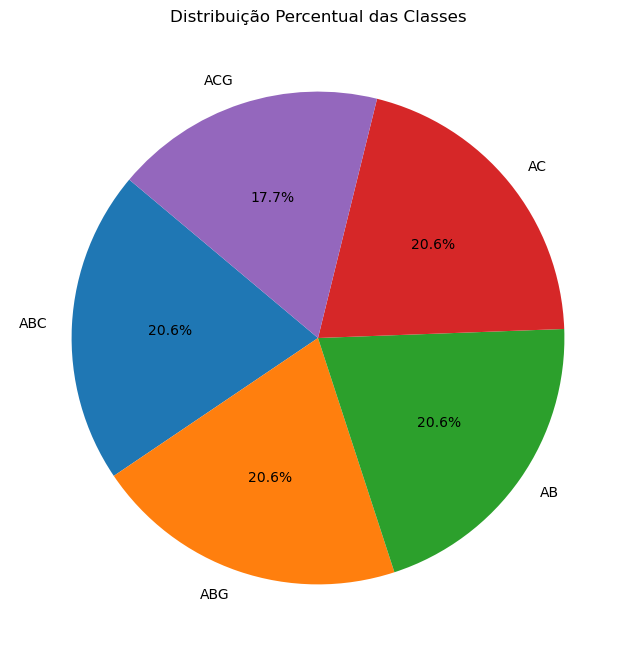

In [23]:
# Dividir os dados em recursos (X) e rótulos (y)
X = data.drop(['fault_type'], axis=1)  # Selecionar os recursos (todas as colunas, exceto a coluna de rótulo)
y = data['fault_type']  # Selecionar a coluna de rótulo

# Adicionar ruído gaussiano aos dados
noise = np.random.normal(0, 1.0, X.shape)  # Média 0, Desvio Padrão 1 (ajuste conforme necessário)
X_with_noise = X + noise

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_with_noise, y, test_size=0.2, random_state=42)

# Criar e treinar um modelo RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de árvores = 100
random_forest.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

# Calcular e exibir métricas de avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo RandomForestClassifier: {accuracy * 100:.2f}%\n')

cv_accuracy = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f'Acurácia média do modelo RandomForestClassifier com validação cruzada: {cv_accuracy * 100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n\n{conf_matrix}\n')

precision_per_class = precision_score(y_test, y_pred, average=None)
print('Precisão por classe:')
for i, prec in enumerate(precision_per_class):
    print(f'Classe {i}: {prec * 100:.2f}%')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'\nPrecisão média do modelo RandomForestClassifier nos dados de teste: {precision * 100:.2f}%\n')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall médio do modelo RandomForestClassifier nos dados de teste: {recall * 100:.2f}%\n')

# Plotar a distribuição percentual das classes
class_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual das Classes')
plt.show()

### Classificação com Ruído de $ \mu = 0, \, \sigma = 2 $

Acurácia do modelo RandomForestClassifier: 71.26%

Acurácia média do modelo RandomForestClassifier com validação cruzada: 70.81%

Matriz de Confusão:

[[2484  108  658   50   45]
 [ 142 2582  252  157  234]
 [ 793  194 2239  112   31]
 [  41  130   72 2534  545]
 [  48  228   51  805 1804]]

Precisão por classe:
Classe 0: 70.81%
Classe 1: 79.64%
Classe 2: 68.43%
Classe 3: 69.27%
Classe 4: 67.85%

Precisão média do modelo RandomForestClassifier nos dados de teste: 71.29%

Recall médio do modelo RandomForestClassifier nos dados de teste: 71.26%



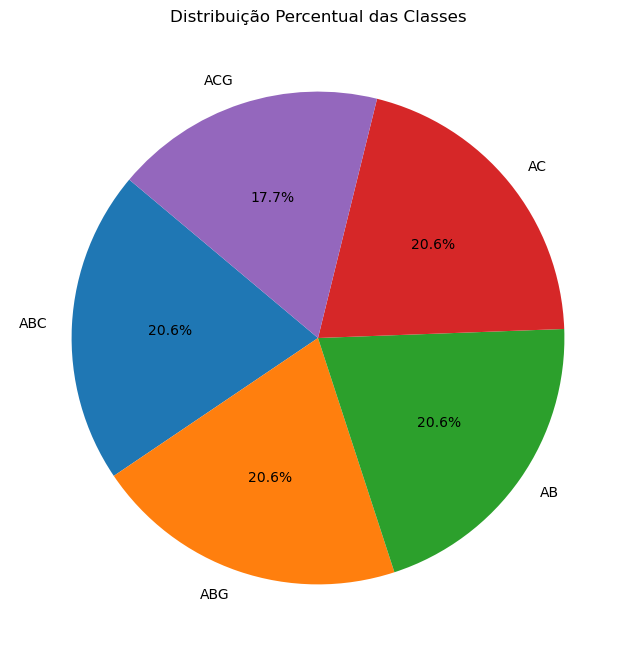

In [26]:
# Dividir os dados em recursos (X) e rótulos (y)
X = data.drop(['fault_type'], axis=1)  # Selecionar os recursos (todas as colunas, exceto a coluna de rótulo)
y = data['fault_type']  # Selecionar a coluna de rótulo

# Adicionar ruído gaussiano aos dados
noise = np.random.normal(0, 2, X.shape)  # Média 0, Desvio Padrão 2 (ajuste conforme necessário)
X_with_noise = X + noise

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_with_noise, y, test_size=0.2, random_state=42)

# Criar e treinar um modelo RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de árvores = 100
random_forest.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

# Calcular e exibir métricas de avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo RandomForestClassifier: {accuracy * 100:.2f}%\n')

cv_accuracy = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f'Acurácia média do modelo RandomForestClassifier com validação cruzada: {cv_accuracy * 100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n\n{conf_matrix}\n')

precision_per_class = precision_score(y_test, y_pred, average=None)
print('Precisão por classe:')
for i, prec in enumerate(precision_per_class):
    print(f'Classe {i}: {prec * 100:.2f}%')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'\nPrecisão média do modelo RandomForestClassifier nos dados de teste: {precision * 100:.2f}%\n')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall médio do modelo RandomForestClassifier nos dados de teste: {recall * 100:.2f}%\n')

# Plotar a distribuição percentual das classes
class_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual das Classes')
plt.show()

### Classificação com Ruído de $ \mu = 0, \, \sigma = 3 $

Acurácia do modelo RandomForestClassifier: 61.48%

Acurácia média do modelo RandomForestClassifier com validação cruzada: 61.34%

Matriz de Confusão:

[[2103  247  791  142   62]
 [ 213 2318  290  292  254]
 [ 920  345 1868  175   61]
 [  81  273   94 2296  578]
 [  81  326   88  980 1461]]

Precisão por classe:
Classe 0: 61.89%
Classe 1: 66.06%
Classe 2: 59.66%
Classe 3: 59.10%
Classe 4: 60.47%

Precisão média do modelo RandomForestClassifier nos dados de teste: 61.47%

Recall médio do modelo RandomForestClassifier nos dados de teste: 61.48%



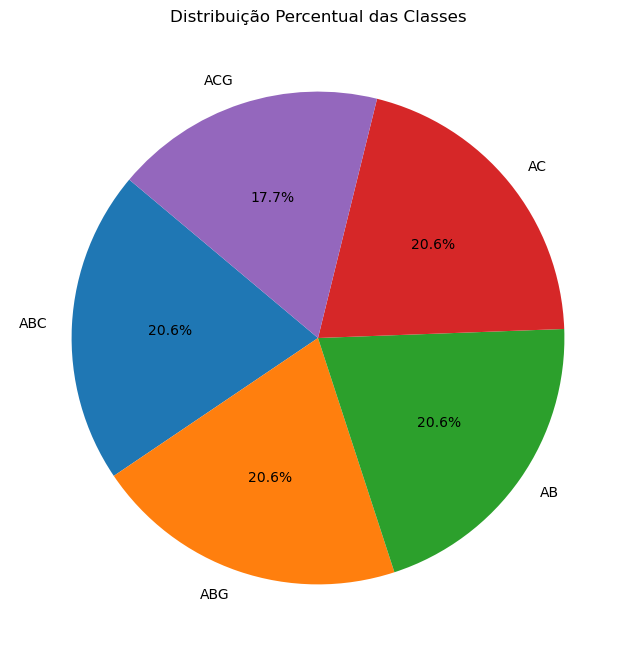

In [27]:
# Dividir os dados em recursos (X) e rótulos (y)
X = data.drop(['fault_type'], axis=1)  # Selecionar os recursos (todas as colunas, exceto a coluna de rótulo)
y = data['fault_type']  # Selecionar a coluna de rótulo

# Adicionar ruído gaussiano aos dados
noise = np.random.normal(0, 3, X.shape)  # Média 0, Desvio Padrão 3 (ajuste conforme necessário)
X_with_noise = X + noise

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_with_noise, y, test_size=0.2, random_state=42)

# Criar e treinar um modelo RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  # Número de árvores = 100
random_forest.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = random_forest.predict(X_test)

# Calcular e exibir métricas de avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo RandomForestClassifier: {accuracy * 100:.2f}%\n')

cv_accuracy = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy').mean()
print(f'Acurácia média do modelo RandomForestClassifier com validação cruzada: {cv_accuracy * 100:.2f}%\n')

conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Matriz de Confusão:\n\n{conf_matrix}\n')

precision_per_class = precision_score(y_test, y_pred, average=None)
print('Precisão por classe:')
for i, prec in enumerate(precision_per_class):
    print(f'Classe {i}: {prec * 100:.2f}%')

precision = precision_score(y_test, y_pred, average='weighted')
print(f'\nPrecisão média do modelo RandomForestClassifier nos dados de teste: {precision * 100:.2f}%\n')

recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall médio do modelo RandomForestClassifier nos dados de teste: {recall * 100:.2f}%\n')

# Plotar a distribuição percentual das classes
class_counts = y.value_counts()
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição Percentual das Classes')
plt.show()